In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.datasets import load_diabetes
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Lasso , LinearRegression
from sklearn.metrics import mean_squared_error, r2_score


In [ ]:
diabetes = load_diabetes()

data = pd.DataFrame(diabetes.data, columns=diabetes.feature_names)
data['target'] = diabetes.target

In [ ]:
data.head()

In [ ]:
X = data.drop('target', axis=1)
y = data['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Applying Linear Regression

In [ ]:

lr = LinearRegression()

lr.fit(X_train, y_train)

y_pred = lr.predict(X_test)

In [ ]:
y_pred

In [ ]:
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R^2 Score: {r2}")

In [ ]:
# Display the coefficients
coef = pd.Series(lr.coef_, index=X.columns)

In [ ]:
coef

### Applying Lasso Regression

In [ ]:

lasso = Lasso(alpha=0.1)

lasso.fit(X_train, y_train)

y_pred = lasso.predict(X_test)

In [ ]:
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R^2 Score: {r2}")

In [ ]:
# Display the coefficients
coef = pd.Series(lasso.coef_, index=X.columns)

In [ ]:
lasso.intercept_

In [ ]:
coef

## SPARSITY IN LASSO

In [1]:
from sklearn.datasets import make_regression
from sklearn.preprocessing import StandardScaler

In [3]:
np.random.seed(42)

In [4]:
X, y = make_regression(n_samples=1000, n_features=100, n_informative=10, noise=0.1, random_state=42)

In [5]:
feature_names = [f'feature_{i}' for i in range(X.shape[1])]
data = pd.DataFrame(X, columns=feature_names)
data['target'] = y

data.head()

,feature_0,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,...,feature_91,feature_92,feature_93,feature_94,feature_95,feature_96,feature_97,feature_98,feature_99,target
0,-0.353273,-1.469201,-0.748674,0.568326,0.442359,-0.209873,0.482965,-0.086548,-0.276123,0.328453,...,-0.721595,-0.627373,2.202578,1.795924,-0.397011,1.392781,-0.719678,0.244672,-2.457507,-234.747811
1,0.257256,2.140309,-0.630692,-0.572608,-0.171383,0.338625,1.846603,-0.085243,-0.202000,0.927974,...,0.347883,-0.447221,-0.185935,0.549527,0.739119,-1.233837,-1.265086,-0.095604,-0.745764,51.233025
2,0.781233,-0.657438,1.976438,-0.169421,-0.920985,0.474556,-0.210418,0.612659,-0.205452,0.967930,...,-0.151687,-0.320438,0.389994,1.184124,-1.637070,-0.513537,1.676920,-0.630121,-1.034070,-106.716029
3,-2.358464,0.204154,-1.579345,0.289784,-0.174711,-0.024830,-1.862864,-0.585063,-0.133526,0.454331,...,-0.825769,-0.228151,-0.014925,0.435048,0.362451,-0.488274,0.282450,2.384598,-0.429833,-55.619155
4,-0.448543,1.635798,0.564842,0.211397,-0.318748,-1.472037,0.644518,0.808036,-1.389299,-0.114802,...,0.305243,-0.048965,-0.739771,-0.143259,1.040062,-1.400071,0.711411,1.122374,1.378470,-111.074505


In [6]:
len(data.columns)

101

In [7]:
X = data.drop('target', axis=1)
y = data['target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [8]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [9]:
lasso = Lasso(alpha=0.1)

lasso.fit(X_train_scaled, y_train)

y_pred = lasso.predict(X_test_scaled)

In [10]:
coef = pd.Series(lasso.coef_, index=X.columns)

In [11]:
coef

feature_0     0.0
feature_1     0.0
feature_2    -0.0
feature_3     0.0
feature_4     0.0
             ... 
feature_95   -0.0
feature_96   -0.0
feature_97    0.0
feature_98   -0.0
feature_99   -0.0
Length: 100, dtype: float64

In [12]:
non_zero_coef = (coef != 0).sum()
print(f"Number of non-zero coefficients: {non_zero_coef}")

Number of non-zero coefficients: 10


In [ ]:
### Initially total input columns : 100
### Non-zero coefficient columns : 10
### Zero coefficient columns : 90

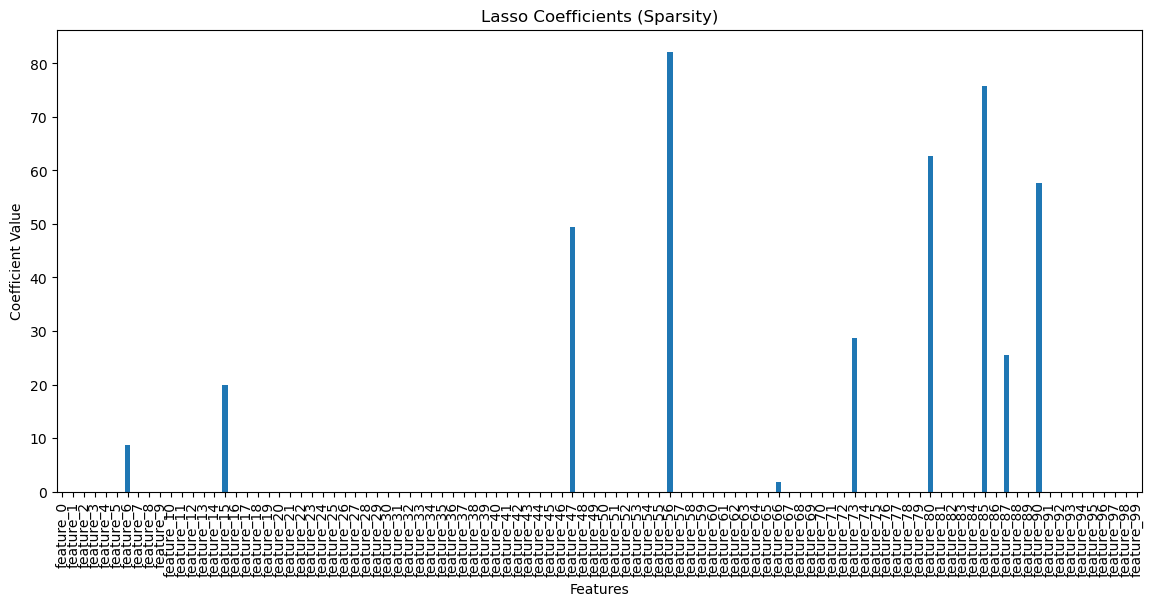

In [13]:
plt.figure(figsize=(14, 6))
coef.plot(kind='bar')
plt.title('Lasso Coefficients (Sparsity)')
plt.xlabel('Features')
plt.ylabel('Coefficient Value')
plt.show()